# **📘 Notebook Structure for Breast Cancer Classification using SVM**

### 1: Import Libraries

We import all required libraries for data handling, visualization, SVM modeling, and evaluation.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
sns.set_style("whitegrid")


### 2: Load and Inspect Dataset

We load the dataset and inspect the first few rows to understand its structure.

In [15]:
# Load the Breast Cancer dataset
df = pd.read_csv("data/breast-cancer.csv")

# Display first few rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3: Preprocessing

We clean the data by dropping unnecessary columns, encoding target labels, and checking for missing values.

In [16]:
# Drop 'id' column 
df.drop('id', axis=1, inplace=True)

# Encode target variable: 'M' (Malignant) = 1, 'B' (Benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### 4: Feature and Target Separation

Separate features (X) and target variable (y)

In [17]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


###  5: Feature Scaling

SVM is sensitive to feature scales; we standardize all features for better performance.

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 6: Train-Test Split

Split the data into training and testing sets (80-20 split).

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### 7: Train SVM with Linear Kernel

Train and evaluate a Linear SVM classifier.

In [20]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# Predict
y_pred_linear = svm_linear.predict(X_test)

# Evaluate
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.956140350877193


### 8: Train SVM with RBF Kernel

rain and evaluate an SVM with RBF kernel for non-linear classification.

In [21]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predict
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9736842105263158


### 9: Confusion Matrix and Classification Report

Generate confusion matrix and classification report for the RBF SVM model.

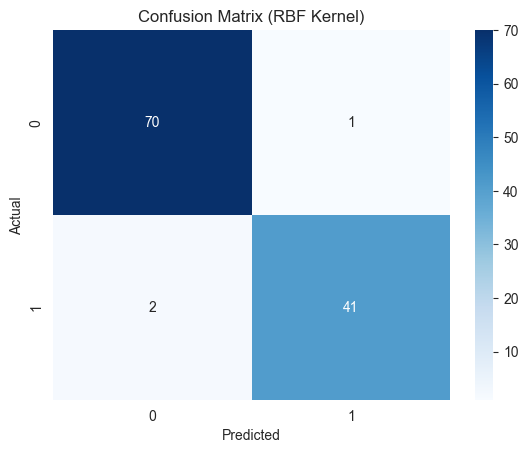

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
# Evaluate RBF SVM in detail
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (RBF Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_rbf))


### 10: Hyperparameter Tuning using Grid Search

Tune hyperparameters C and gamma using Grid Search with cross-validation to improve performance.

In [23]:
# Grid Search for best parameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9736263736263737


### 11: Cross-Validation on Final Model

Use cross-validation to evaluate the stability and generalization of the tuned SVM model.

In [24]:
final_model = grid.best_estimator_
cv_scores = cross_val_score(final_model, X_scaled, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Score: 0.9736376339077782


### ✅ Conclusion

- SVM with both **Linear** and **RBF kernels** performed well on the Breast Cancer dataset.
- RBF kernel generally achieved slightly better performance due to its ability to capture non-linear relationships.
- Feature scaling significantly improved SVM performance.
- Hyperparameter tuning using Grid Search allowed us to find optimal values of **C** and **gamma**.
- Cross-validation confirmed that the model performs consistently across different data splits.
